## Iteration 4
#### Yuqi Chen(ych872)

### 2. Data understanding

In [2]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('DU').getOrCreate()

import numpy as np
import matplotlib.pyplot as plt

from pyspark.sql.functions import when,col

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/12 07:55:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Importing data which has a header. Schema is automatically configured.
PI = spark.read.csv('personal_information_BRFSS2015.csv', header=True, inferSchema=True)
HH = spark.read.csv('health_habits_BRFSS2015.csv', header=True, inferSchema=True)

In [4]:
PI.describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|               id|               BMI|               Sex|               Age|         Education|            Income|           Married|
+-------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|           253680|            253530|            253558|            253638|            253680|            253577|            253435|
|   mean|         126840.5|28.607001143848855|0.4403765607868811|  8.03188008106041| 5.050433617155472|6.0540979662982055|0.4986880265156746|
| stddev|73231.25248143719|16.380852840541976|0.4964332960707399|3.0541466670193755|0.9857741757276464|  2.07110855871066|0.4999992651683611|
|    min|                1|                12|                 0|                 1|                 1|                 1|                 0|
|    m

In [5]:
HH.describe().show()

+-------+-----------------+-------------------+-------------------+-------------------+-------------------+------------------+--------------------+--------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-----------------+------------------+-------------------+-------------------+
|summary|               id|       Diabetes_012|             HighBP|           HighChol|          CholCheck|            Smoker|              Stroke|HeartDiseaseorAttack|      PhysActivity|            Fruits|            Veggies|  HvyAlcoholConsump|      AnyHealthcare|        NoDocbcCost|           GenHlth|         MentHlth|          PhysHlth|           DiffWalk|         GeneHistry|
+-------+-----------------+-------------------+-------------------+-------------------+-------------------+------------------+--------------------+--------------------+------------------+------------------+-------------------+--------

In [6]:
PI.printSchema()

root
 |-- id: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Married: integer (nullable = true)



In [7]:
HH.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Diabetes_012: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- Smoker: integer (nullable = true)
 |-- Stroke: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- Fruits: integer (nullable = true)
 |-- Veggies: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: integer (nullable = true)
 |-- NoDocbcCost: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- GeneHistry: integer (nullable = true)



In [8]:
PI.show()

+---+---+---+---+---------+------+-------+
| id|BMI|Sex|Age|Education|Income|Married|
+---+---+---+---+---------+------+-------+
|  1| 40|  0|  9|        4|     3|      1|
|  2| 25|  0|  7|        6|     1|      0|
|  3| 28|  0|  9|        4|     8|      1|
|  4| 27|  0| 11|        3|     6|      0|
|  5| 24|  0| 11|        5|     4|      0|
|  6| 25|  1| 10|        6|     8|      0|
|  7| 30|  0|  9|        6|     7|      1|
|  8| 25|  0| 11|        4|     4|      1|
|  9| 30|  0|  9|        5|     1|      1|
| 10| 24|  1|  8|        4|     3|      1|
| 11| 25|  1| 13|        6|     8|      1|
| 12| 34|  0| 10|        5|     1|      0|
| 13| 26|  0|  7|        5|     7|      1|
| 14| 28|  0| 11|        4|     6|      1|
| 15| 33|  0|  4|        6|     2|      1|
| 16| 33|  0|  6|        6|     8|      0|
| 17| 21|  0| 10|        4|     3|      0|
| 18| 23|  1|  7|        5|     6|      1|
| 19| 23|  0|  2|        6|     7|      0|
| 20| 28|  1|  4|        6|     8|      1|
+---+---+--

In [9]:
HH.show()

+---+------------+------+--------+---------+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+----------+
| id|Diabetes_012|HighBP|HighChol|CholCheck|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|GeneHistry|
+---+------------+------+--------+---------+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+----------+
|  1|           0|     1|       1|        1|     1|     0|                   0|           0|     0|      1|                0|            1|          0|      5|      18|      15|       1|         1|
|  2|           0|     0|       0|        0|     1|     0|                   0|           1|     0|      0|                0|            0|          1|      3|       0|       0|       0|         1|
|  3|     

In [11]:
from pyspark.sql import functions as F

# Replace values 1 and 2 with 1 in the 'diabete_012' column
HH = HH.withColumn('Diabetes_012', F.when(F.col('Diabetes_012').isin([1, 2]), 1).otherwise(F.col('Diabetes_012')))

# Show the updated DataFrame to verify the changes
HH.show()


+---+------------+------+--------+---------+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+----------+
| id|Diabetes_012|HighBP|HighChol|CholCheck|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|GeneHistry|
+---+------------+------+--------+---------+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+----------+
|  1|           0|     1|       1|        1|     1|     0|                   0|           0|     0|      1|                0|            1|          0|      5|      18|      15|       1|         1|
|  2|           0|     0|       0|        0|     1|     0|                   0|           1|     0|      0|                0|            0|          1|      3|       0|       0|       0|         1|
|  3|     

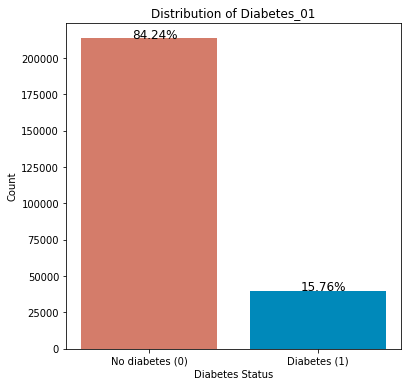

In [12]:
# Count values and sort them by index
value_counts = HH.groupBy("Diabetes_012").count().orderBy("Diabetes_012").collect()

# Extract index and values for plotting
index = [row['Diabetes_012'] for row in value_counts]
values = [row['count'] for row in value_counts]

# Calculate percentages
total_count = sum(values)
percentage = [(count / total_count) * 100 for count in values]

# Plotting
plt.figure(figsize=(6, 6))
bars = plt.bar(index, values, color=['#D47C6A', '#0089BA'])
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Distribution of Diabetes_01')
plt.xticks(index, ['No diabetes (0)', 'Diabetes (1)'])

# Annotate with percentages
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,
             bar.get_height() - 5,
             f'{percentage[i]:.2f}%',
             fontsize=12)

plt.show()


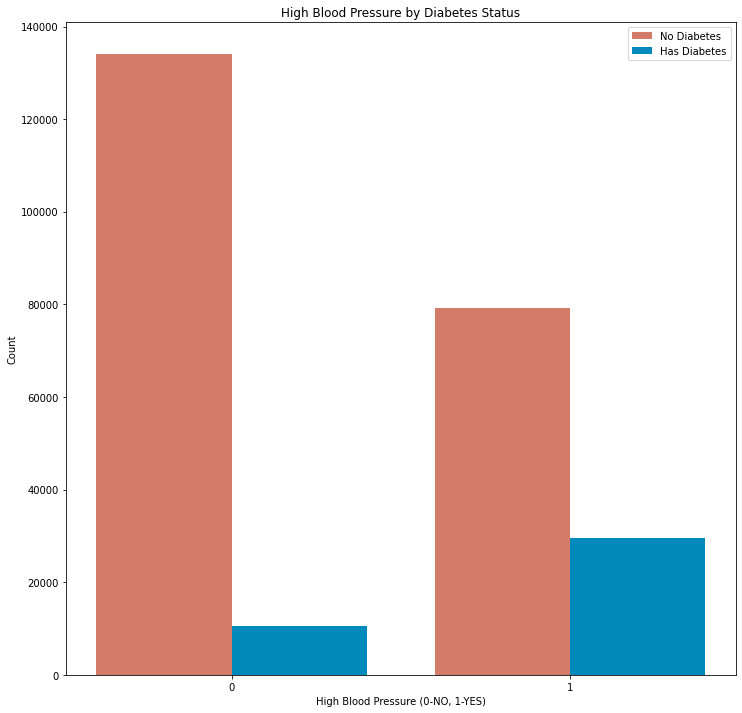

In [13]:
grouped = HH.na.drop().groupBy(['Diabetes_012', 'HighBP']).count().toPandas().sort_values(by=['HighBP'])

plt.figure(figsize=(12, 12))

# no-diabetes
no_diabetes = grouped[grouped['Diabetes_012'] == 0]
plt.bar(no_diabetes['HighBP'] - 0.2, no_diabetes['count'], width=0.4, label='No Diabetes', color='#D47C6A')

# have-diabetes
has_diabetes = grouped[grouped['Diabetes_012'] == 1]
plt.bar(has_diabetes['HighBP'] + 0.2, has_diabetes['count'], width=0.4, label='Has Diabetes', color='#0089BA')

plt.xlabel('High Blood Pressure (0-NO, 1-YES)')
plt.ylabel('Count')
plt.title('High Blood Pressure by Diabetes Status')
plt.xticks(ticks=sorted(set(grouped['HighBP'])))
plt.legend()

plt.show()


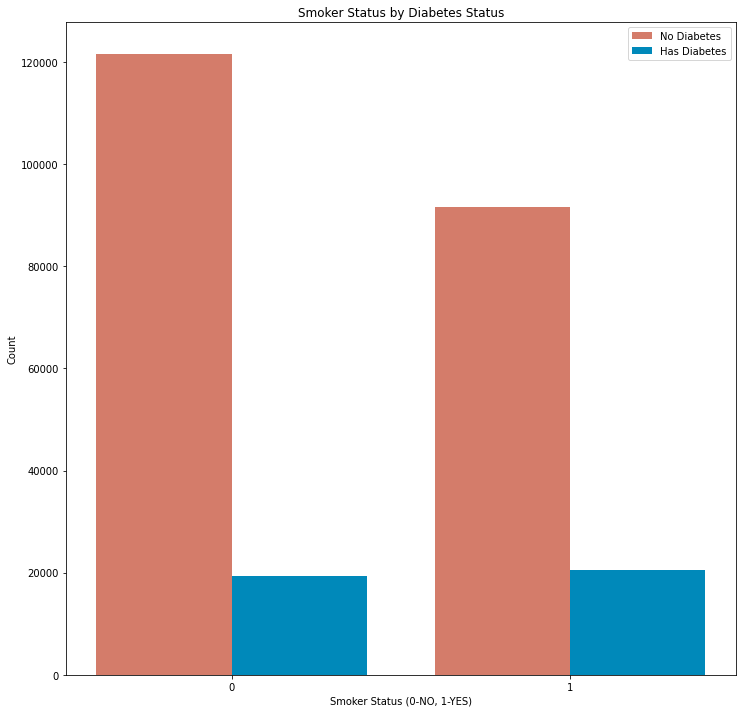

In [14]:
grouped = HH.na.drop().groupBy(['Diabetes_012', 'Smoker']).count().toPandas().sort_values(by=['Smoker'])

plt.figure(figsize=(12, 12))

# no-diabetes
no_diabetes = grouped[grouped['Diabetes_012'] == 0]
plt.bar(no_diabetes['Smoker'] - 0.2, no_diabetes['count'], width=0.4, label='No Diabetes', color='#D47C6A')

# have-diabetes
has_diabetes = grouped[grouped['Diabetes_012'] == 1]
plt.bar(has_diabetes['Smoker'] + 0.2, has_diabetes['count'], width=0.4, label='Has Diabetes', color='#0089BA')

plt.xlabel('Smoker Status (0-NO, 1-YES)')
plt.ylabel('Count')
plt.title('Smoker Status by Diabetes Status')
plt.xticks(ticks=sorted(set(grouped['Smoker'])))
plt.legend()

plt.show()

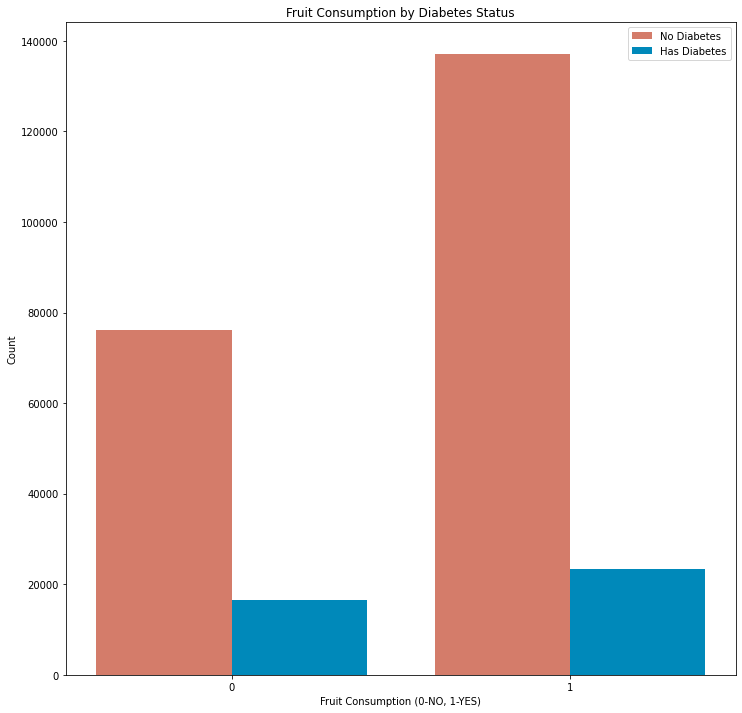

In [15]:
grouped = HH.na.drop().groupBy(['Diabetes_012', 'Fruits']).count().toPandas().sort_values(by=['Fruits'])

plt.figure(figsize=(12, 12))

# no-diabetes
no_diabetes = grouped[grouped['Diabetes_012'] == 0]
plt.bar(no_diabetes['Fruits'] - 0.2, no_diabetes['count'], width=0.4, label='No Diabetes', color='#D47C6A')

# have-diabetes
has_diabetes = grouped[grouped['Diabetes_012'] == 1]
plt.bar(has_diabetes['Fruits'] + 0.2, has_diabetes['count'], width=0.4, label='Has Diabetes', color='#0089BA')

plt.xlabel('Fruit Consumption (0-NO, 1-YES)')
plt.ylabel('Count')
plt.title('Fruit Consumption by Diabetes Status')
plt.xticks(ticks=sorted(set(grouped['Fruits'])))
plt.legend()

plt.show()

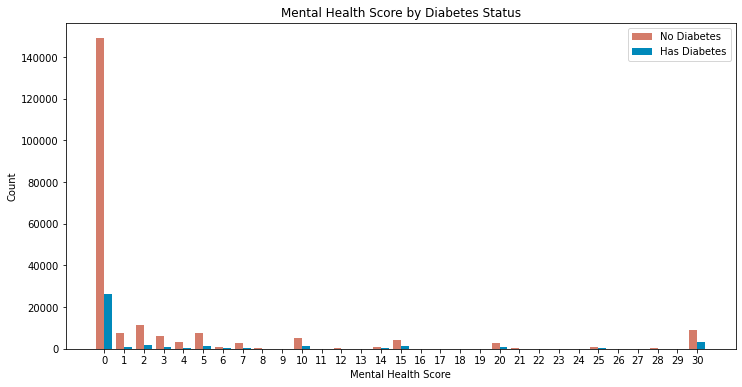

In [16]:
grouped = HH.na.drop().groupBy(['Diabetes_012', 'MentHlth']).count().toPandas().sort_values(by=['MentHlth'])

plt.figure(figsize=(12, 6))

# no-diabetes
no_diabetes = grouped[grouped['Diabetes_012'] == 0]
plt.bar(no_diabetes['MentHlth'] - 0.2, no_diabetes['count'], width=0.4, label='No Diabetes', color='#D47C6A')

# have-diabetes
has_diabetes = grouped[grouped['Diabetes_012'] == 1]
plt.bar(has_diabetes['MentHlth'] + 0.2, has_diabetes['count'], width=0.4, label='Has Diabetes', color='#0089BA')

plt.xlabel('Mental Health Score')
plt.ylabel('Count')
plt.title('Mental Health Score by Diabetes Status')
plt.xticks(ticks=sorted(set(grouped['MentHlth'])))
plt.legend()

plt.show()

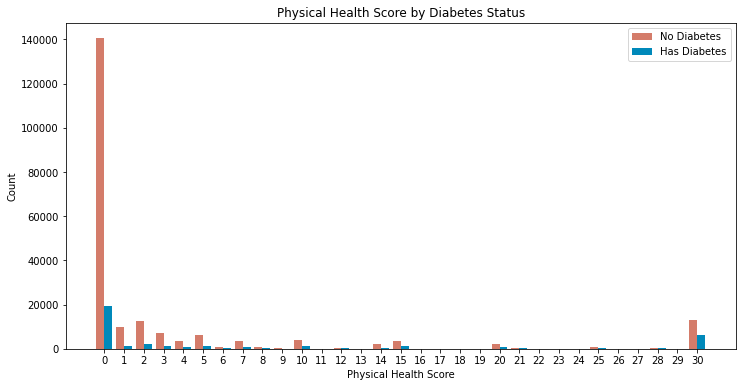

In [17]:
grouped = HH.na.drop().groupBy(['Diabetes_012', 'PhysHlth']).count().toPandas().sort_values(by=['PhysHlth'])

plt.figure(figsize=(12, 6))

# no-diabetes
no_diabetes = grouped[grouped['Diabetes_012'] == 0]
plt.bar(no_diabetes['PhysHlth'] - 0.2, no_diabetes['count'], width=0.4, label='No Diabetes', color='#D47C6A')

# have-diabetes
has_diabetes = grouped[grouped['Diabetes_012'] == 1]
plt.bar(has_diabetes['PhysHlth'] + 0.2, has_diabetes['count'], width=0.4, label='Has Diabetes', color='#0089BA')

plt.xlabel('Physical Health Score')
plt.ylabel('Count')
plt.title('Physical Health Score by Diabetes Status')
plt.xticks(ticks=sorted(set(grouped['PhysHlth'])))
plt.legend()

plt.show()

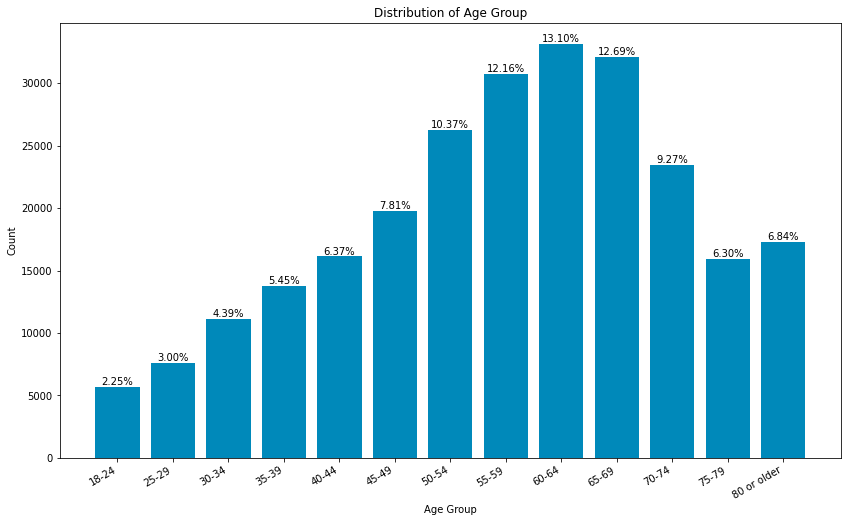

In [18]:
grouped_df = PI.na.drop().groupBy('Age').count().toPandas().sort_values(by=['Age'])

total_count = grouped_df['count'].sum()

labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(grouped_df['Age'])), grouped_df['count'], color=['#0089BA'])

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Group')


plt.xticks(ticks=range(len(grouped_df['Age'])), labels = labels, rotation=30, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{(yval/total_count)*100:.2f}%', ha='center', va='bottom')

plt.show()


In [32]:
def check_data_quality(spark_df):
    quality_report = {}
    
    # Check for missing values
    missing_values = {col: spark_df.filter(F.col(col).isNull()).count() for col in spark_df.columns}
    quality_report['Missing Values'] = {k: v for k, v in missing_values.items() if v > 0} if any(missing_values.values()) else 'No missing values'

    # Check for negative numbers (assuming all columns are numerical)
    negative_numbers = {col: spark_df.filter(F.col(col) < 0).count() for col in spark_df.columns}
    quality_report['Negative Numbers'] = {k: v for k, v in negative_numbers.items() if v > 0} if any(negative_numbers.values())  else 'No negative numbers'

    # Check for outliers using Z-score
    # Computing the mean and standard deviation of each column
    stats_dict = {}
    for col in spark_df.columns:
        stats = spark_df.select(F.mean(col).alias('mean'), F.stddev(col).alias('std')).collect()[0]
        stats_dict[col] = {'mean': stats['mean'], 'std': stats['std']}
    
    # Counting outliers
    outliers = {}
    for col in spark_df.columns:
        mean = stats_dict[col]['mean']
        std = stats_dict[col]['std']
        count = spark_df.filter((F.abs(F.col(col) - mean) / std) > 3).count()
        if count > 0:
            outliers[col] = count

    quality_report['Outliers'] = outliers if outliers else 'No outliers'

    return quality_report

In [ ]:
# Example usage

report = check_data_quality(PI)
if report:
    for key, value in report.items():
        print(f"{key}:\n{value}\n")
else:
    print("No issues found.")

In [23]:
report = check_data_quality(HH)
if report:
    for key, value in report.items():
        print(f"{key}:\n{value}\n")
else:
    print("No issues found.")

Missing Values:
{'HighBP': 31, 'HighChol': 26, 'CholCheck': 35, 'Smoker': 105, 'Stroke': 29, 'HeartDiseaseorAttack': 138, 'PhysActivity': 29, 'Fruits': 119, 'Veggies': 29, 'HvyAlcoholConsump': 52, 'NoDocbcCost': 42, 'MentHlth': 39}

Negative Numbers:
No negative numbers

Outliers:
{'CholCheck': 9467, 'Stroke': 10292, 'HeartDiseaseorAttack': 23881, 'HvyAlcoholConsump': 14254, 'AnyHealthcare': 12417, 'NoDocbcCost': 21350, 'MentHlth': 12696}



### 3. Data preparation

In [25]:
from pyspark.sql.functions import col
HH = HH.drop(col("GeneHistry"))
HH = HH.drop(col("CholCheck"))
PI = PI.drop(col("Married"))

In [26]:
# Function to remove missing values and outliers
def remove_missing_and_outliers(spark_df):
    for column in spark_df.columns:
        # Remove missing values
        spark_df = spark_df.filter(F.col(column).isNotNull())

        # Remove outliers using Z-score
        mean_value, std_value = spark_df.select(F.mean(column), F.stddev(column)).first()

        upper_bound = mean_value + 3 * std_value
        lower_bound = mean_value - 3 * std_value

        spark_df = spark_df.filter((F.col(column) >= lower_bound) & (F.col(column) <= upper_bound))

    return spark_df


# Function to impute missing values with mean
def impute_with_mean(spark_df):
    for column in spark_df.columns:
        mean_value = spark_df.select(F.mean(column)).first()[0]
        spark_df = spark_df.na.fill(mean_value, [column])

    return spark_df


In [38]:
HH = remove_missing_and_outliers(HH)

In [55]:
PI = remove_missing_and_outliers(PI)

In [31]:
report = check_data_quality(HH)
if report:
    for key, value in report.items():
        print(f"{key}:\n{value}\n")
else:
    print("No issues found.")

Missing Values:
No missing values

Negative Numbers:
No negative numbers

Outliers:
{'MentHlth': 1367, 'PhysHlth': 1149}



In [33]:
HH = HH.withColumnRenamed("Diabetes_012","Diabetes")

In [60]:
from pyspark.sql.functions import when
PI = PI.withColumn("Age",
                    when((PI["Age"] > 0) & (PI["Age"] <= 6), 1)
                    .when((PI["Age"] > 6) & (PI["Age"] <= 9), 2)
                    .when((PI["Age"] > 9) & (PI["Age"] <= 13), 3)
                    .otherwise(None))


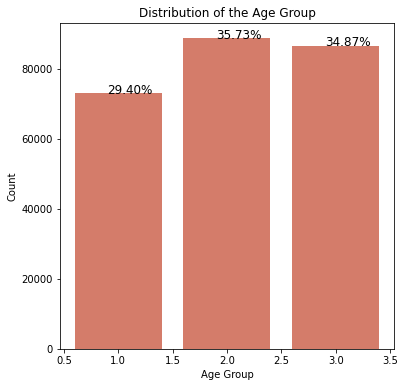

In [61]:
# Count values and sort them by index
value_counts = PI.groupBy("Age").count().orderBy("Age").collect()

# Extract index and values for plotting
index = [row['Age'] for row in value_counts]
values = [row['count'] for row in value_counts]

# Calculate percentages
total_count = sum(values)
percentage = [(count / total_count) * 100 for count in values]

# Plotting
plt.figure(figsize=(6, 6))
bars = plt.bar(index, values, color=['#D47C6A'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of the Age Group')

# Annotate with percentages
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,
             bar.get_height() - 5,
             f'{percentage[i]:.2f}%',
             fontsize=12)

plt.show()

In [42]:
Diabetes.show()

+--------+------+--------+---+------+------+--------------------+------------+-------+-----------------+-------+--------+--------+--------+---+---+---------+------+
|Diabetes|HighBP|HighChol|BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Veggies|HvyAlcoholConsump|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|
+--------+------+--------+---+------+------+--------------------+------------+-------+-----------------+-------+--------+--------+--------+---+---+---------+------+
|       0|     1|       1| 40|     1|     0|                   0|           0|      1|                0|      5|      18|      15|       1|  0|  1|        4|     3|
|       0|     0|       0| 25|     1|     0|                   0|           1|      0|                0|      3|       0|       0|       0|  0|  1|        6|     1|
|       0|     1|       1| 28|     0|     0|                   0|           0|      0|                0|      5|      30|      30|       1|  0|  1|        4|     8|
|       0|

In [63]:
Diabetes = HH.join(PI,['id'], how = 'inner').drop('id')
#Diabetes.to_csv('diabetes.csv')

### 4.Data transformation

In [3]:
#read the new file
Diabetes = spark.read.csv('diabetes.csv', header=True, inferSchema=True)

In [4]:
Diabetes.printSchema()

root
 |-- Diabetes: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Smoker: integer (nullable = true)
 |-- Stroke: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- Veggies: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Fruits: integer (nullable = true)



In [104]:
Diabetes.show()

+--------+------+--------+---+------+------+--------------------+------------+-------+-----------------+-------+--------+--------+--------+---+---+---------+------+------+
|Diabetes|HighBP|HighChol|BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Veggies|HvyAlcoholConsump|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|Fruits|
+--------+------+--------+---+------+------+--------------------+------------+-------+-----------------+-------+--------+--------+--------+---+---+---------+------+------+
|       0|     1|       1| 40|     1|     0|                   0|           0|      1|                0|      5|      18|      15|       1|  0|  2|        4|     3|     1|
|       0|     0|       0| 25|     1|     0|                   0|           1|      0|                0|      3|       0|       0|       0|  0|  2|        6|     1|     1|
|       0|     1|       1| 28|     0|     0|                   0|           0|      0|                0|      5|      30|      30|       1| 

In [70]:
Diabetes.describe().show()

+-------+-------------------+------------------+------------------+------------------+-------------------+-------------------+--------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+
|summary|           Diabetes|            HighBP|          HighChol|               BMI|             Smoker|             Stroke|HeartDiseaseorAttack|      PhysActivity|           Veggies|  HvyAlcoholConsump|           GenHlth|          MentHlth|          PhysHlth|           DiffWalk|               Sex|               Age|         Education|            Income|
+-------+-------------------+------------------+------------------+------------------+-------------------+-------------------+--------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+

In [73]:
Diabetes.stat.corr('Diabetes', 'HighBP')

0.26312878992336086

In [74]:
Diabetes.stat.corr('Diabetes', 'Age')

0.17350130241726436

In [79]:
Diabetes.columns

['Diabetes',
 'HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [27]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import ChiSquareTest
# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=['HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income'],
outputCol="features")
# Let's transform the data. 
output = assembler.transform(Diabetes)
data = output.select('features','Diabetes')


In [28]:
data

DataFrame[features: vector, Diabetes: int]

In [111]:
result = ChiSquareTest.test(data, 'features','Diabetes',True)

In [112]:
result.show()

+------------+------------------+----------------+-------------------+
|featureIndex|            pValue|degreesOfFreedom|          statistic|
+------------+------------------+----------------+-------------------+
|           4|               0.0|               1|   2840.46513056138|
|          16|               0.0|               7|  7003.715090707579|
|          14|               0.0|               2|  7702.615127419396|
|           0|               0.0|               1| 17563.981298751656|
|           6|               0.0|               1| 3540.2142015854865|
|           8|               0.0|               1|   825.834022870207|
|          12|               0.0|               1|  12094.00526609052|
|          10|               0.0|              30| 1452.0954401640256|
|           2|               0.0|              83| 14715.988202162398|
|          13|               0.0|               1|   250.596462669135|
|          15|               0.0|               5| 4027.1122818613003|
|     

In [4]:
Diabetes = Diabetes.drop(col("Fruits"))

In [5]:
# Count the number of each class
class1_count = Diabetes.filter(Diabetes['Diabetes'] == 1).count()
class0_count = Diabetes.filter(Diabetes['Diabetes'] == 0).count()

# Calculate the ratio
ratio = class1_count / float(class1_count + class0_count)

# Perform the undersampling
Diabetes_new = Diabetes.sampleBy('Diabetes', fractions={0: ratio, 1: 1.0}).cache()


In [43]:
class1 = Diabetes.filter(Diabetes['Diabetes'] == 1)
class1_count = class1.count()
class0 = Diabetes.filter(Diabetes['Diabetes'] == 0)
class0_count = class0.count()

d = class1.sample(True, class0_count/class1_count,1221)
new_data = d.union(class0)

In [44]:
new_data.describe().show()

+-------+-------------------+-------------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+--------------------+------------------+-----------------+------------------+-------------------+-------------------+------------------+------------------+------------------+
|summary|           Diabetes|             HighBP|          HighChol|               BMI|            Smoker|             Stroke|HeartDiseaseorAttack|      PhysActivity|           Veggies|   HvyAlcoholConsump|           GenHlth|         MentHlth|          PhysHlth|           DiffWalk|                Sex|               Age|         Education|            Income|
+-------+-------------------+-------------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+--------------------+------------------+-----------------+------------------+------------------

In [17]:
Diabetes_new.describe().show()

+-------+-------------------+-------------------+------------------+-----------------+------------------+-------------------+--------------------+------------------+------------------+--------------------+------------------+-----------------+------------------+------------------+-------------------+------------------+-----------------+------------------+
|summary|           Diabetes|             HighBP|          HighChol|              BMI|            Smoker|             Stroke|HeartDiseaseorAttack|      PhysActivity|           Veggies|   HvyAlcoholConsump|           GenHlth|         MentHlth|          PhysHlth|          DiffWalk|                Sex|               Age|        Education|            Income|
+-------+-------------------+-------------------+------------------+-----------------+------------------+-------------------+--------------------+------------------+------------------+--------------------+------------------+-----------------+------------------+------------------+------

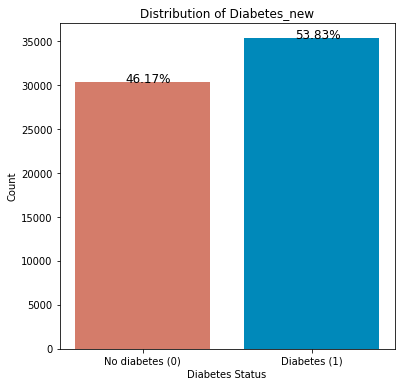

In [18]:
# Count values and sort them by index
value_counts = Diabetes_new.groupBy("Diabetes").count().orderBy("Diabetes").collect()

# Extract index and values for plotting
index = [row['Diabetes'] for row in value_counts]
values = [row['count'] for row in value_counts]

# Calculate percentages
total_count = sum(values)
percentage = [(count / total_count) * 100 for count in values]

# Plotting
plt.figure(figsize=(6, 6))
bars = plt.bar(index, values, color=['#D47C6A', '#0089BA'])
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Distribution of Diabetes_new')
plt.xticks(index, ['No diabetes (0)', 'Diabetes (1)'])

# Annotate with percentages
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,
             bar.get_height() - 5,
             f'{percentage[i]:.2f}%',
             fontsize=12)

plt.show()


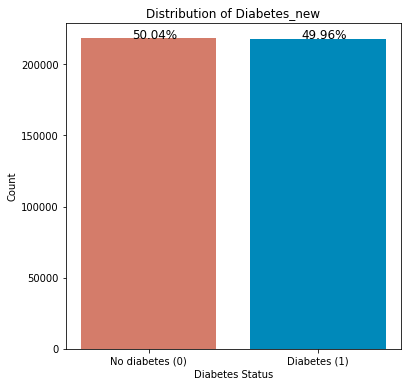

In [45]:
# Count values and sort them by index
value_counts = new_data.groupBy("Diabetes").count().orderBy("Diabetes").collect()

# Extract index and values for plotting
index = [row['Diabetes'] for row in value_counts]
values = [row['count'] for row in value_counts]

# Calculate percentages
total_count = sum(values)
percentage = [(count / total_count) * 100 for count in values]

# Plotting
plt.figure(figsize=(6, 6))
bars = plt.bar(index, values, color=['#D47C6A', '#0089BA'])
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Distribution of Diabetes_new')
plt.xticks(index, ['No diabetes (0)', 'Diabetes (1)'])

# Annotate with percentages
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,
             bar.get_height() - 5,
             f'{percentage[i]:.2f}%',
             fontsize=12)

plt.show()

### 6. Datamining algorithm

In [7]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [8]:
assembler = VectorAssembler(
  inputCols=['HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income'],
outputCol="features")
# Let's transform the data. 
output = assembler.transform(Diabetes_new)
final_data = output.select('features','Diabetes')

In [9]:
(trainingData, testData) = final_data.randomSplit([0.8, 0.2],1221)

In [12]:
lr = LogisticRegression(featuresCol='features',labelCol='Diabetes')
lrModel = lr.fit(trainingData)
result = lrModel.transform(testData)

evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Diabetes', metricName='accuracy')
accuracy = evaluator.evaluate(result)
accuracy

23/10/12 06:30:30 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/12 06:30:30 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


0.747792619424949

In [ ]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='Diabetes')
evaluator.evaluate(result)

In [60]:
result.select('Diabetes','prediction').show()

+--------+----------+
|Diabetes|prediction|
+--------+----------+
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       0.0|
|       1|       0.0|
|       1|       0.0|
|       1|       1.0|
+--------+----------+
only showing top 20 rows



In [35]:
predictions_and_labels.predictions

DataFrame[features: vector, Diabetes: int, rawPrediction: vector, probability: vector, prediction: double]

In [13]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol='features',labelCol='Diabetes', numTrees=100,maxDepth = 10, impurity = 'entropy')
model_rf = rf.fit(trainingData)
prediction_rf = model_rf.transform(testData)
accuracy_rf = evaluator.evaluate(prediction_rf)
accuracy_rf

23/10/12 06:31:01 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/10/12 06:31:15 WARN DAGScheduler: Broadcasting large task binary with size 1842.5 KiB
23/10/12 06:31:19 WARN DAGScheduler: Broadcasting large task binary with size 3.5 MiB
23/10/12 06:31:22 WARN DAGScheduler: Broadcasting large task binary with size 1008.8 KiB
23/10/12 06:31:23 WARN DAGScheduler: Broadcasting large task binary with size 6.4 MiB
23/10/12 06:31:27 WARN DAGScheduler: Broadcasting large task binary with size 1720.8 KiB
23/10/12 06:31:30 WARN DAGScheduler: Broadcasting large task binary with size 11.3 MiB
23/10/12 06:31:34 WARN DAGScheduler: Broadcasting large task binary with size 2.7 MiB
23/10/12 06:31:37 WARN DAGScheduler: Broadcasting large task binary with size 6.6 MiB


0.7492264734737001

In [11]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol='features',
                            labelCol='Diabetes', 
                            numTrees=100,
                            maxDepth = 10, 
                            minInstancesPerNode=5, 
                            impurity = 'entropy')
model_rf = rf.fit(trainingData)
prediction_rf = model_rf.transform(testData)
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Diabetes', metricName='accuracy')
accuracy_rf = evaluator.evaluate(prediction_rf)
accuracy_rf

23/10/12 07:57:55 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/10/12 07:58:14 WARN DAGScheduler: Broadcasting large task binary with size 1839.6 KiB
23/10/12 07:58:18 WARN DAGScheduler: Broadcasting large task binary with size 3.5 MiB
23/10/12 07:58:21 WARN DAGScheduler: Broadcasting large task binary with size 1018.0 KiB
23/10/12 07:58:23 WARN DAGScheduler: Broadcasting large task binary with size 6.3 MiB
23/10/12 07:58:26 WARN DAGScheduler: Broadcasting large task binary with size 1739.8 KiB
23/10/12 07:58:29 WARN DAGScheduler: Broadcasting large task binary with size 10.9 MiB
23/10/12 07:58:33 WARN DAGScheduler: Broadcasting large task binary with size 2.7 MiB
23/10/12 07:58:36 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB


0.7499242194604425

In [66]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='Diabetes')
evaluator.evaluate(prediction_rf)

0.7398929634068991

In [14]:
model_rf.toDebugString

'RandomForestClassificationModel: uid=RandomForestClassifier_fc6eaba5f145, numTrees=100, numClasses=2, numFeatures=17\n  Tree 0 (weight 1.0):\n    If (feature 9 <= 2.5)\n     If (feature 2 <= 28.5)\n      If (feature 1 <= 0.5)\n       If (feature 2 <= 25.5)\n        If (feature 9 <= 1.5)\n         If (feature 12 <= 0.5)\n          If (feature 3 <= 0.5)\n           Predict: 0.0\n          Else (feature 3 > 0.5)\n           If (feature 13 <= 0.5)\n            Predict: 0.0\n           Else (feature 13 > 0.5)\n            If (feature 14 <= 2.5)\n             Predict: 0.0\n            Else (feature 14 > 2.5)\n             If (feature 0 <= 0.5)\n              Predict: 0.0\n             Else (feature 0 > 0.5)\n              Predict: 1.0\n         Else (feature 12 > 0.5)\n          If (feature 11 <= 21.5)\n           Predict: 0.0\n          Else (feature 11 > 21.5)\n           Predict: 1.0\n        Else (feature 9 > 1.5)\n         If (feature 12 <= 0.5)\n          If (feature 14 <= 2.5)\n     

In [15]:
model_rf.featureImportances

SparseVector(17, {0: 0.2291, 1: 0.0898, 2: 0.1495, 3: 0.0041, 4: 0.0034, 5: 0.0233, 6: 0.0065, 7: 0.0041, 8: 0.0092, 9: 0.2663, 10: 0.0132, 11: 0.0234, 12: 0.039, 13: 0.0085, 14: 0.0897, 15: 0.0117, 16: 0.0292})

In [13]:
from pyspark.sql import functions as F

conf_matrix = prediction_rf.groupBy("Diabetes", "prediction").count()
conf_matrix.show()


23/10/12 06:53:29 WARN DAGScheduler: Broadcasting large task binary with size 5.2 MiB


+--------+----------+-----+
|Diabetes|prediction|count|
+--------+----------+-----+
|       1|       0.0| 1223|
|       0|       0.0| 4006|
|       1|       1.0| 5966|
|       0|       1.0| 1989|
+--------+----------+-----+



23/10/12 06:53:31 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB


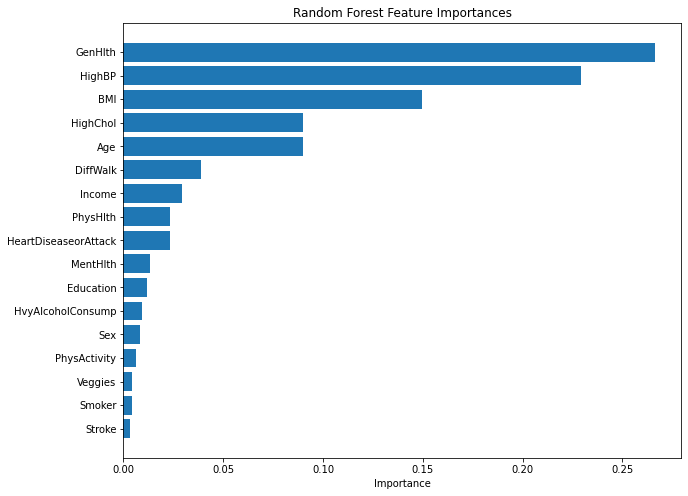

In [16]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = ['HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']
feature_importances = model_rf.featureImportances.toArray()
sorted_idx = feature_importances.argsort()

# 创建图
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()


In [17]:
prediction_rf.show()

23/10/12 07:44:17 WARN DAGScheduler: Broadcasting large task binary with size 5.2 MiB


+--------------------+--------+--------------------+--------------------+----------+
|            features|Diabetes|       rawPrediction|         probability|prediction|
+--------------------+--------+--------------------+--------------------+----------+
|(17,[0,1,2,3,4,5,...|       1|[20.6795919151347...|[0.20679591915134...|       1.0|
|(17,[0,1,2,3,4,6,...|       1|[27.4068511996798...|[0.27406851199679...|       1.0|
|(17,[0,1,2,3,4,6,...|       1|[21.5587397910819...|[0.21558739791081...|       1.0|
|(17,[0,1,2,3,4,7,...|       0|[25.5485921586402...|[0.25548592158640...|       1.0|
|(17,[0,1,2,3,4,7,...|       1|[17.1138466808406...|[0.17113846680840...|       1.0|
|(17,[0,1,2,3,4,7,...|       1|[17.8832743563282...|[0.17883274356328...|       1.0|
|(17,[0,1,2,3,4,9,...|       1|[27.5424345227203...|[0.27542434522720...|       1.0|
|(17,[0,1,2,3,4,9,...|       1|[25.5996676060683...|[0.25599667606068...|       1.0|
|(17,[0,1,2,3,4,9,...|       1|[18.9137349253812...|[0.1891373492

In [ ]:
from pyspark.ml.classification import RandomForestClassifier


# Show the number of trees in the model
print(f'Number of Trees: {model_rf.getNumTrees}')

# Feature importances
print('Feature Importances:')
print(model_rf.featureImportances)

# For each tree in the forest, you can print out its individual structure
for i, tree in enumerate(model_rf.trees):
    print(f'Tree {i}:')
    print(tree.toDebugString)

### 8.iteration

In [14]:
(trainingData, testData) = final_data.randomSplit([0.9, 0.1],1221)

In [15]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol='features',
                            labelCol='Diabetes', 
                            numTrees=100,
                            maxDepth = 10, 
                            minInstancesPerNode=5, 
                            impurity = 'entropy')
model_rf = rf.fit(trainingData)
prediction_rf = model_rf.transform(testData)
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Diabetes', metricName='accuracy')
accuracy_rf = evaluator.evaluate(prediction_rf)
accuracy_rf

23/10/12 08:51:01 WARN DAGScheduler: Broadcasting large task binary with size 1842.8 KiB
23/10/12 08:51:04 WARN DAGScheduler: Broadcasting large task binary with size 3.5 MiB
23/10/12 08:51:08 WARN DAGScheduler: Broadcasting large task binary with size 1027.1 KiB
23/10/12 08:51:09 WARN DAGScheduler: Broadcasting large task binary with size 6.4 MiB
23/10/12 08:51:14 WARN DAGScheduler: Broadcasting large task binary with size 1783.9 KiB
23/10/12 08:51:16 WARN DAGScheduler: Broadcasting large task binary with size 11.1 MiB
23/10/12 08:51:21 WARN DAGScheduler: Broadcasting large task binary with size 2.8 MiB
23/10/12 08:51:24 WARN DAGScheduler: Broadcasting large task binary with size 5.3 MiB


0.7540859564164649

In [16]:
(trainingData, testData) = final_data.randomSplit([0.7, 0.3],1221)

In [17]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol='features',
                            labelCol='Diabetes', 
                            numTrees=100,
                            maxDepth = 10, 
                            minInstancesPerNode=5, 
                            impurity = 'entropy')
model_rf = rf.fit(trainingData)
prediction_rf = model_rf.transform(testData)
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Diabetes', metricName='accuracy')
accuracy_rf = evaluator.evaluate(prediction_rf)
accuracy_rf

23/10/12 08:51:37 WARN DAGScheduler: Broadcasting large task binary with size 1839.1 KiB
23/10/12 08:51:40 WARN DAGScheduler: Broadcasting large task binary with size 3.4 MiB
23/10/12 08:51:43 WARN DAGScheduler: Broadcasting large task binary with size 1002.6 KiB
23/10/12 08:51:45 WARN DAGScheduler: Broadcasting large task binary with size 6.2 MiB
23/10/12 08:51:48 WARN DAGScheduler: Broadcasting large task binary with size 1695.4 KiB
23/10/12 08:51:50 WARN DAGScheduler: Broadcasting large task binary with size 10.7 MiB
23/10/12 08:51:54 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
23/10/12 08:51:57 WARN DAGScheduler: Broadcasting large task binary with size 5.0 MiB


0.7501264286436735

In [18]:
(trainingData, testData) = final_data.randomSplit([0.6, 0.4],1221)

In [19]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol='features',
                            labelCol='Diabetes', 
                            numTrees=100,
                            maxDepth = 10, 
                            minInstancesPerNode=5, 
                            impurity = 'entropy')
model_rf = rf.fit(trainingData)
prediction_rf = model_rf.transform(testData)
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Diabetes', metricName='accuracy')
accuracy_rf = evaluator.evaluate(prediction_rf)
accuracy_rf

23/10/12 08:52:10 WARN DAGScheduler: Broadcasting large task binary with size 1835.4 KiB
23/10/12 08:52:12 WARN DAGScheduler: Broadcasting large task binary with size 3.4 MiB
23/10/12 08:52:16 WARN DAGScheduler: Broadcasting large task binary with size 6.1 MiB
23/10/12 08:52:19 WARN DAGScheduler: Broadcasting large task binary with size 1653.8 KiB
23/10/12 08:52:21 WARN DAGScheduler: Broadcasting large task binary with size 10.4 MiB
23/10/12 08:52:25 WARN DAGScheduler: Broadcasting large task binary with size 2.5 MiB
23/10/12 08:52:27 WARN DAGScheduler: Broadcasting large task binary with size 4.9 MiB


0.7497147204260175

In [21]:
Diabetes1 = Diabetes_new.drop(col("GenHlth"))

In [22]:
assembler = VectorAssembler(
  inputCols=['HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income'],
outputCol="features")
# Let's transform the data. 
output1 = assembler.transform(Diabetes1)
final_data1 = output1.select('features','Diabetes')

In [23]:
(trainingData, testData) = final_data1.randomSplit([0.8, 0.2],1221)

from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol='features',
                            labelCol='Diabetes', 
                            numTrees=100,
                            maxDepth = 10, 
                            minInstancesPerNode=5, 
                            impurity = 'entropy')
model_rf = rf.fit(trainingData)
prediction_rf = model_rf.transform(testData)
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Diabetes', metricName='accuracy')
accuracy_rf = evaluator.evaluate(prediction_rf)
accuracy_rf

23/10/12 09:03:58 WARN DAGScheduler: Broadcasting large task binary with size 1811.4 KiB
23/10/12 09:04:01 WARN DAGScheduler: Broadcasting large task binary with size 3.4 MiB
23/10/12 09:04:04 WARN DAGScheduler: Broadcasting large task binary with size 1007.2 KiB
23/10/12 09:04:05 WARN DAGScheduler: Broadcasting large task binary with size 6.2 MiB
23/10/12 09:04:09 WARN DAGScheduler: Broadcasting large task binary with size 1728.8 KiB
23/10/12 09:04:11 WARN DAGScheduler: Broadcasting large task binary with size 10.6 MiB
23/10/12 09:04:15 WARN DAGScheduler: Broadcasting large task binary with size 2.7 MiB
23/10/12 09:04:17 WARN DAGScheduler: Broadcasting large task binary with size 4.9 MiB


0.7401485298575325

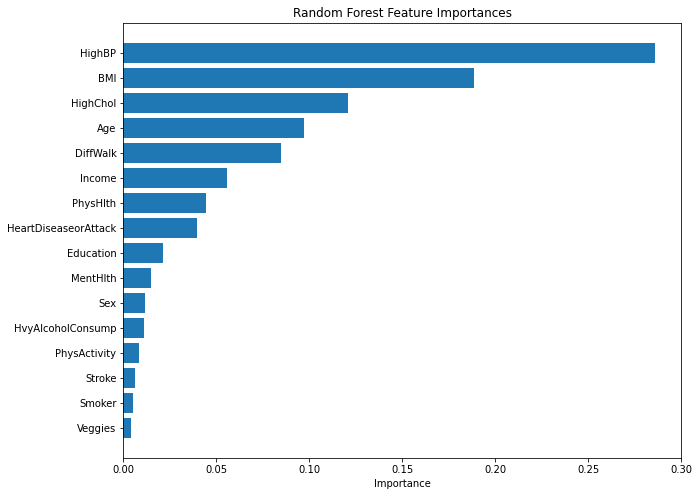

In [24]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = ['HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']
feature_importances = model_rf.featureImportances.toArray()
sorted_idx = feature_importances.argsort()

# 创建图
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()


23/10/12 09:08:04 WARN DAGScheduler: Broadcasting large task binary with size 1830.1 KiB
23/10/12 09:08:14 WARN DAGScheduler: Broadcasting large task binary with size 3.5 MiB
23/10/12 09:08:25 WARN DAGScheduler: Broadcasting large task binary with size 1066.2 KiB
23/10/12 09:08:26 WARN DAGScheduler: Broadcasting large task binary with size 6.6 MiB
23/10/12 09:08:38 WARN DAGScheduler: Broadcasting large task binary with size 1924.7 KiB
23/10/12 09:08:40 WARN DAGScheduler: Broadcasting large task binary with size 12.1 MiB
23/10/12 09:08:55 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
23/10/12 09:08:57 WARN DAGScheduler: Broadcasting large task binary with size 3.9 MiB


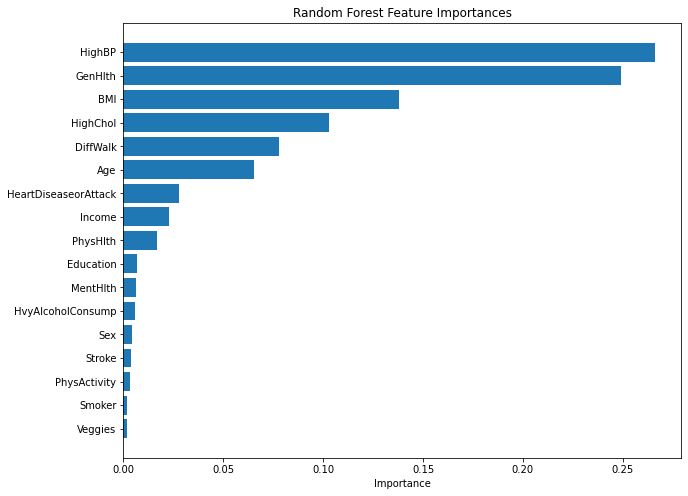

In [25]:
assembler = VectorAssembler(
  inputCols=['HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income'],
outputCol="features")
# Let's transform the data. 
output = assembler.transform(Diabetes)
final_data = output.select('features','Diabetes')

(trainingData, testData) = final_data.randomSplit([0.8, 0.2],1221)

from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol='features',
                            labelCol='Diabetes', 
                            numTrees=100,
                            maxDepth = 10, 
                            minInstancesPerNode=5, 
                            impurity = 'entropy')
model_rf = rf.fit(trainingData)
prediction_rf = model_rf.transform(testData)
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Diabetes', metricName='accuracy')
accuracy_rf = evaluator.evaluate(prediction_rf)
accuracy_rf

feature_names = ['HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']
feature_importances = model_rf.featureImportances.toArray()
sorted_idx = feature_importances.argsort()

# 创建图
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()


In [26]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol='features',
                            labelCol='Diabetes', 
                            numTrees=100,
                            maxDepth = 10, 
                            minInstancesPerNode=5, 
                            impurity = 'entropy')
model_rf = rf.fit(trainingData)
prediction_rf = model_rf.transform(testData)
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Diabetes', metricName='accuracy')
accuracy_rf = evaluator.evaluate(prediction_rf)
accuracy_rf

23/10/12 09:10:22 WARN DAGScheduler: Broadcasting large task binary with size 1830.1 KiB
23/10/12 09:10:35 WARN DAGScheduler: Broadcasting large task binary with size 3.5 MiB
23/10/12 09:10:45 WARN DAGScheduler: Broadcasting large task binary with size 1066.2 KiB
23/10/12 09:10:46 WARN DAGScheduler: Broadcasting large task binary with size 6.6 MiB
23/10/12 09:10:58 WARN DAGScheduler: Broadcasting large task binary with size 1924.7 KiB
23/10/12 09:11:00 WARN DAGScheduler: Broadcasting large task binary with size 12.1 MiB
23/10/12 09:11:14 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
23/10/12 09:11:17 WARN DAGScheduler: Broadcasting large task binary with size 3.9 MiB


0.8646225392634047